In our dataset we have only names of lighthouses, but for our analysis we need coordinates. For that purpose we will use GeoPy library and Nominatim class from the OpenStreetMap project (an open-source geocoding tool). It enables developers to translate between exact geographic coordinates and human-readable addresses. Nominatim is a well-liked option for geocoding needs due to its user-friendly interface and large database.

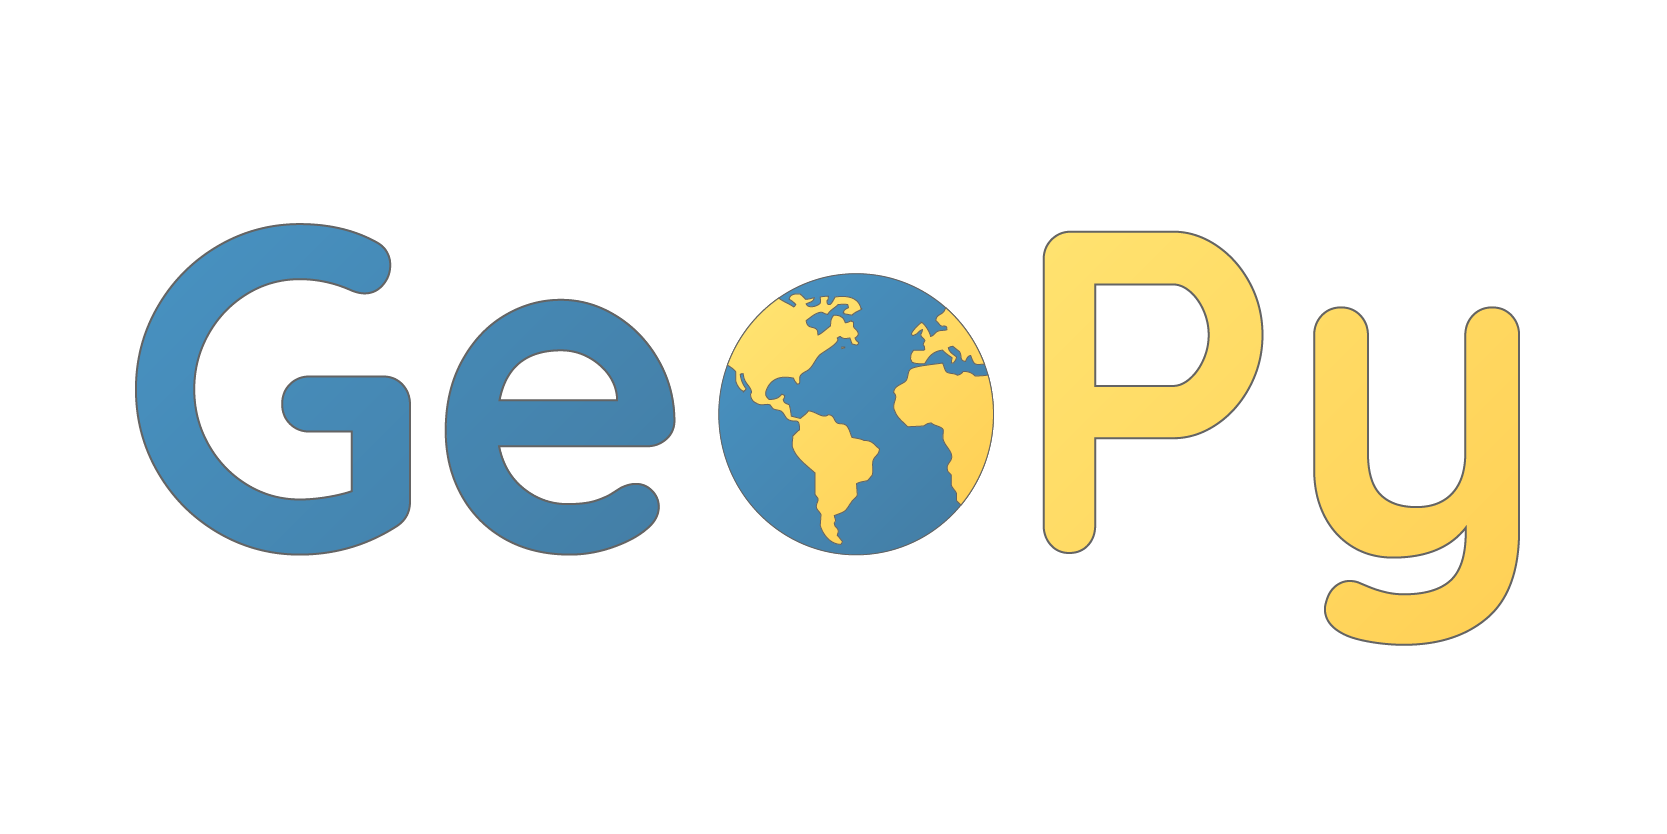

In [13]:
#import library for working with data se
import pandas as pd
# importing geopy library and Nominatim class
from geopy.geocoders import Nominatim

In [14]:
data = pd.read_csv('/content/lighthouses_names.csv')

In [15]:
data.head()

,no,id,Name,Lighthouse,Country
0,61,K4388,Ackers Point,lighthouse,New Zealand
1,52,K4314,Akaroa Head,lighthouse,New Zealand
2,84,K4237,Anatakupu Island,lighthouse,New Zealand
3,46,K4004,Baring Head,lighthouse,New Zealand
4,42,K3993,Black Head,lighthouse,New Zealand


In [16]:
len(data)

91

In [17]:
# calling the Nominatim tool and create Nominatim class
loc = Nominatim(user_agent="Geopy Library")

# entering the location name
getLoc = loc.geocode(data['Name'][0])

# printing address
print(getLoc.address)

# printing latitude and longitude
print("Latitude = ", getLoc.latitude, "\n")
print("Longitude = ", getLoc.longitude)

Ackers Point, Ackers Point Track, Stewart Island / Rakiura Community, Southland District, Southland, 9818, New Zealand / Aotearoa
Latitude =  -46.8956037 

Longitude =  168.1636248


In [18]:
# calling the Nominatim tool and create Nominatim class
loc = Nominatim(user_agent="Geopy Library")

data['address'] = 0
data['latitude'] = 0
data['longitude'] = 0
for i in range(len(data)):
    # entering the location name
    getLoc = loc.geocode(data['Name'][i])

    # printing address
    data['address'][i] = getLoc.address

    # printing latitude and longitude
    data['latitude'][i] =  getLoc.latitude
    data['longitude'][i] =  getLoc.longitude

<ipython-input-18-f02ea98706f5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['address'][i] = getLoc.address
<ipython-input-18-f02ea98706f5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['latitude'][i] =  getLoc.latitude
<ipython-input-18-f02ea98706f5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['longitude'][i] =  getLoc.longitude


In [19]:
data.head()

,no,id,Name,Lighthouse,Country,address,latitude,longitude
0,61,K4388,Ackers Point,lighthouse,New Zealand,"Ackers Point, Ackers Point Track, Stewart Isla...",-46.895604,168.163625
1,52,K4314,Akaroa Head,lighthouse,New Zealand,"Akaroa Head, Akaroa, Banks Peninsula Community...",-43.889942,172.979011
2,84,K4237,Anatakupu Island,lighthouse,New Zealand,"Anatakupu Island, Marlborough, New Zealand / A...",-40.896575,173.869151
3,46,K4004,Baring Head,lighthouse,New Zealand,"Baring Head / Ōrua-pouanui, Lower Hutt City, W...",-41.408215,174.870698
4,42,K3993,Black Head,lighthouse,New Zealand,"Black Head, Mid-Coast Council, New South Wales...",-32.070832,152.543087


In [20]:
data.to_csv('/content/pre_final.csv')

As a result, we have coordinates (latitude and longitude) of lighthouses from our original dataset. However, our file is not so accurate as we expect so we can modify some rows manually.